In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [26]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha','fDist', 'class']
df = pd.read_csv('data/magic04.data', names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [27]:
df["class"] = (df['class'] == "g").astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


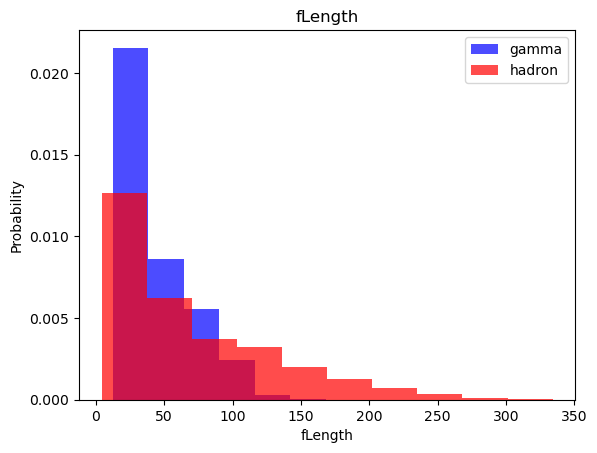

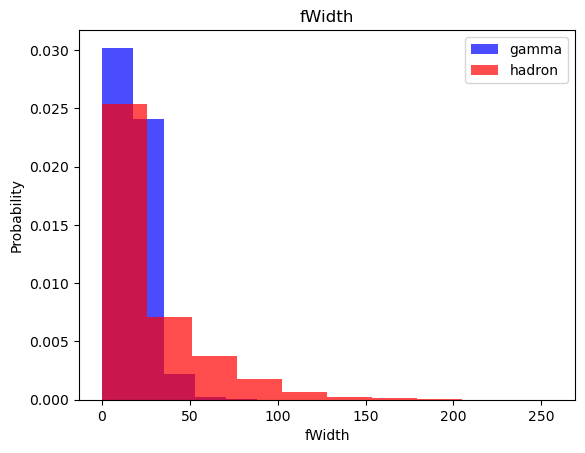

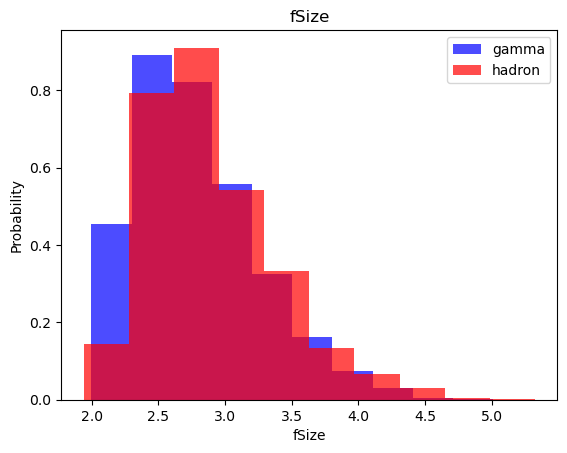

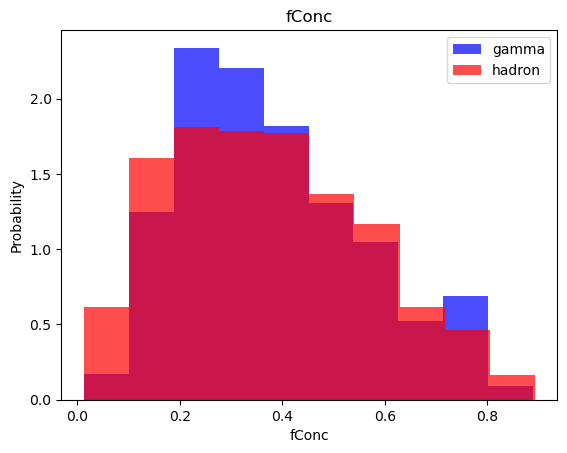

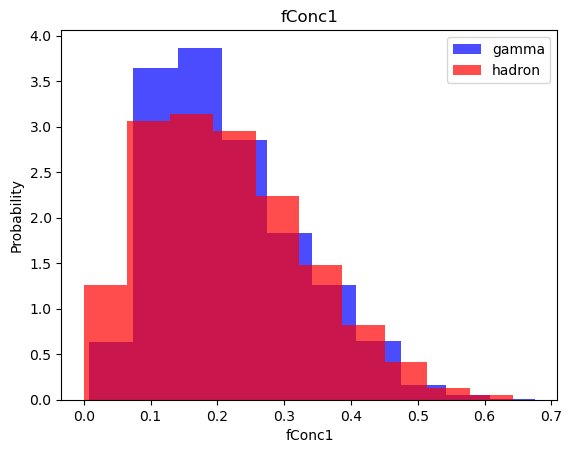

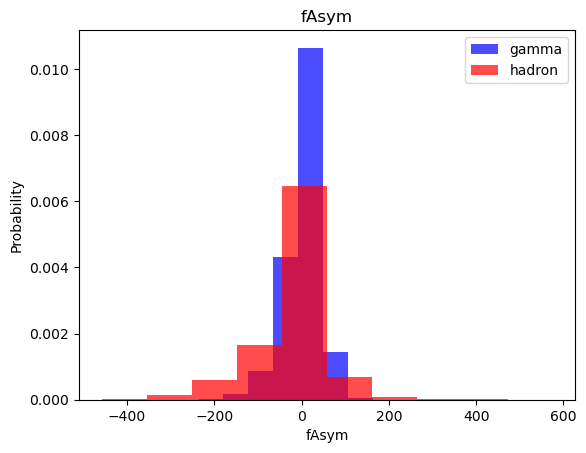

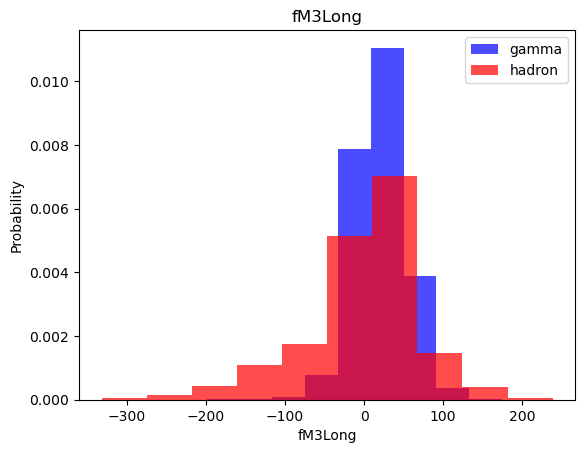

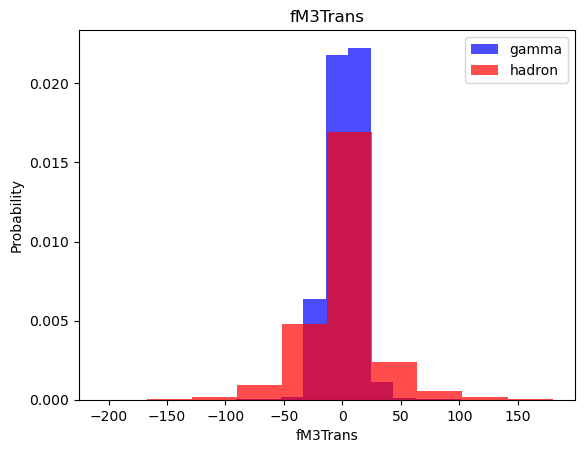

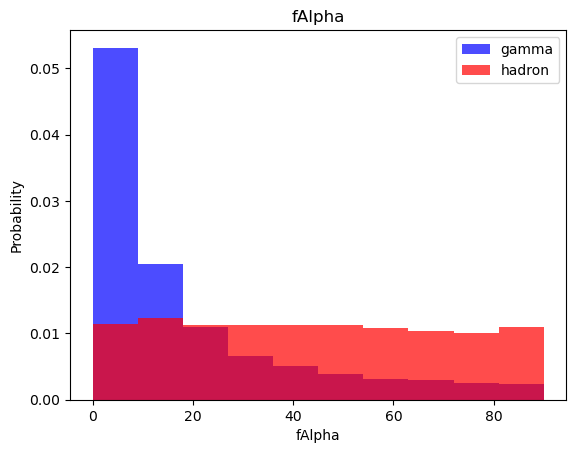

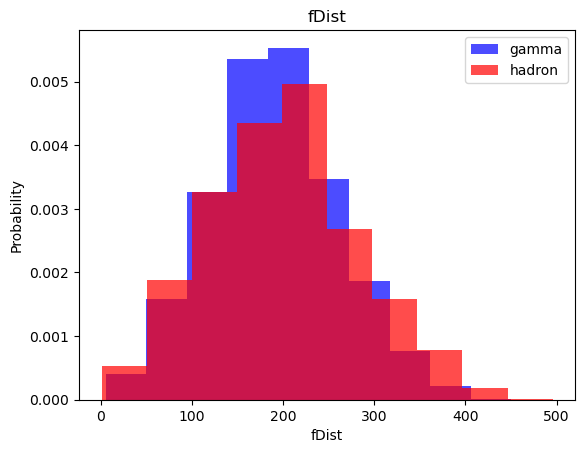

In [28]:
for label in cols[:-1]:
	plt.hist(df[df['class']==1][label], color='blue', label='gamma', alpha=0.7, density=True)
	plt.hist(df[df['class']==0][label], color='red', label='hadron', alpha=0.7, density=True)
	plt.title(label)
	plt.ylabel('Probability')
	plt.xlabel(label)
	plt.legend()
	plt.show()

In [29]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8 * len(df))])
print(len(train))
print(len(valid))
print(len(test))

11412
3804
3804


/home/happypotter/anaconda3/envs/pylearn/lib/python3.9/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [30]:
def scale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x,y)
  
    data = np.hstack((x,np.reshape(y, (-1, 1))))

    return data, x, y

In [31]:
train, x_train, y_train = scale_dataset(dataframe=train, oversample=True)
valid, x_valid, y_valid = scale_dataset(dataframe=valid, oversample=False)
test, x_test, y_test = scale_dataset(dataframe=test, oversample=False)

### k-nearest Neighbour
result calculates based on nearest neighbours


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [33]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [34]:
y_pred = knn_model.predict(x_test)


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74      1363
           1       0.85      0.87      0.86      2441

    accuracy                           0.82      3804
   macro avg       0.81      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



### Naive Bayes Model
result calculated based on Bayes's theorem

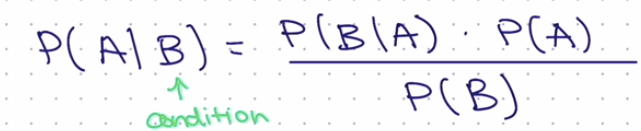 

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [38]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.43      0.54      1363
           1       0.74      0.90      0.81      2441

    accuracy                           0.73      3804
   macro avg       0.72      0.67      0.67      3804
weighted avg       0.73      0.73      0.71      3804



### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [41]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1363
           1       0.84      0.82      0.83      2441

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



### Support Vector Machines

In [42]:
from sklearn.svm import SVC

In [43]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [44]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1363
           1       0.89      0.89      0.89      2441

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



### Neural Networks

In [45]:
import tensorflow as tf

In [46]:
def plot_history(history):
	fig, (ax1, ax2) =plt.subplots(1, 2, figsize=(10, 4))
	ax1.plot(history.history['loss'], label='loss')
	ax1.plot(history.history['val_loss'], label='val_loss')
	ax1.set_xlabel('Epoch')
	ax1.set_ylabel('Binary crossentropy')
	ax1.legend()
	ax1.grid(True)

	ax2.plot(history.history['accuracy'], label='accuracy')
	ax2.plot(history.history['val_accuracy'], label='val_accuracy')
	ax2.set_xlabel('Epoch')
	ax2.set_ylabel('Accuracy')
	ax2.grid(True)

	plt.show()

In [47]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs, x_valid, y_valid):

	nm_model = tf.keras.Sequential([
		tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
		tf.keras.layers.Dropout(dropout_prob),
		tf.keras.layers.Dense(num_nodes, activation='relu'),
		tf.keras.layers.Dropout(dropout_prob),
		tf.keras.layers.Dense(1, activation='sigmoid')
	])
	nm_model.compile(optimizer=tf.keras.optimizers.Adamax(lr), loss='binary_crossentropy', metrics=['accuracy'])

	history = nm_model.fit(
		x_train, y_train, 
		epochs=epochs, batch_size=batch_size, validation_data=(x_train, y_train) , verbose=0
	)

	return nm_model, history


16 nodes, dropout 0, lr 0.01, batch_size 32


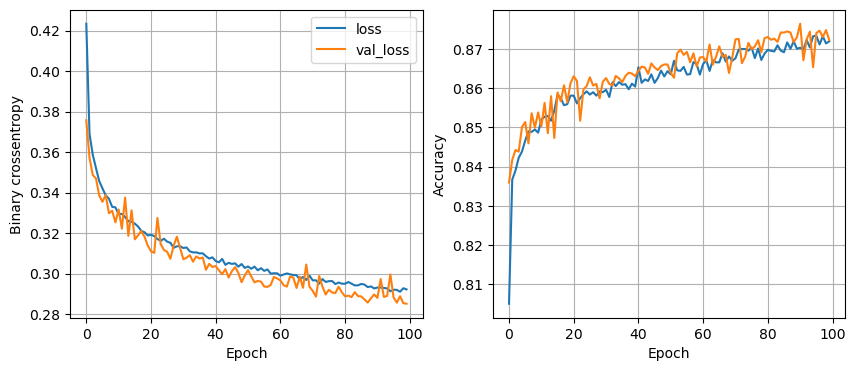

119/119 [==============================] - 0s 672us/step - loss: 0.3397 - accuracy: 0.8583
16 nodes, dropout 0, lr 0.01, batch_size 64


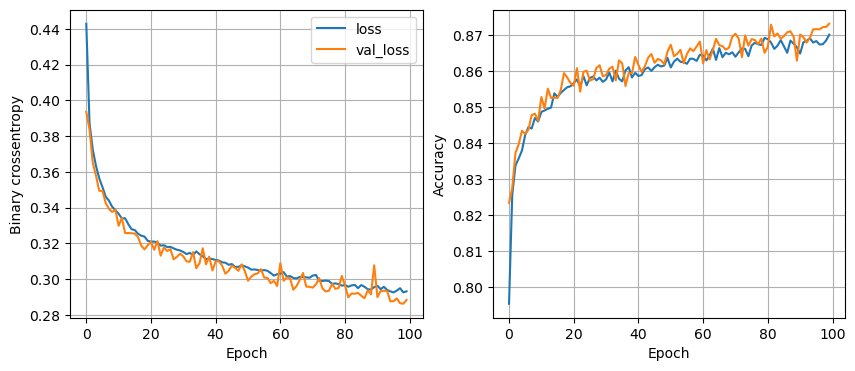

119/119 [==============================] - 0s 715us/step - loss: 0.3324 - accuracy: 0.8612
16 nodes, dropout 0, lr 0.01, batch_size 128


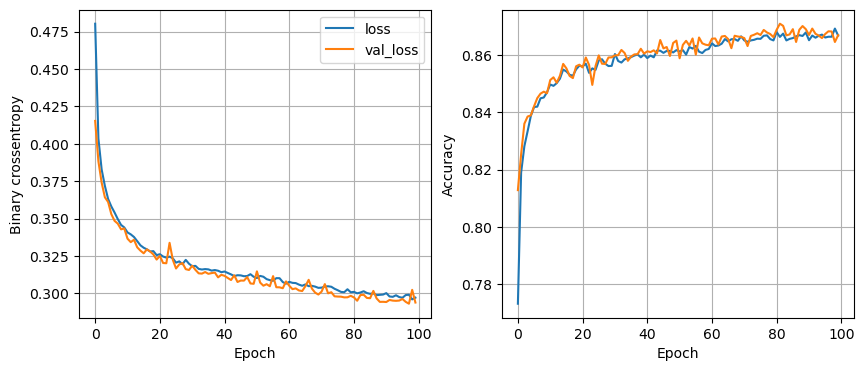

119/119 [==============================] - 0s 602us/step - loss: 0.3192 - accuracy: 0.8667
16 nodes, dropout 0, lr 0.005, batch_size 32


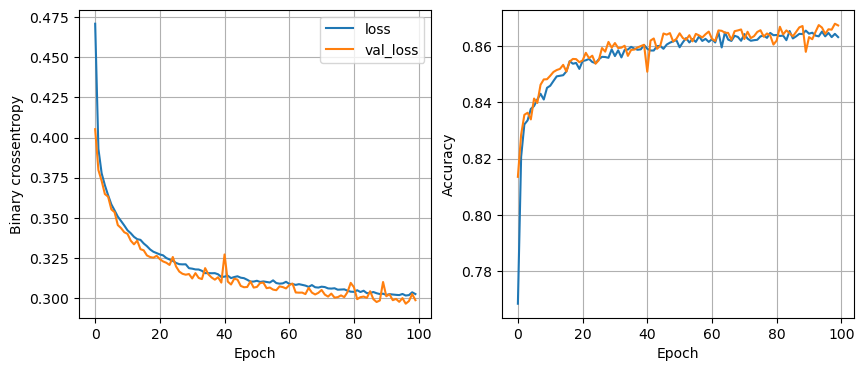

119/119 [==============================] - 0s 523us/step - loss: 0.3459 - accuracy: 0.8570
16 nodes, dropout 0, lr 0.005, batch_size 64


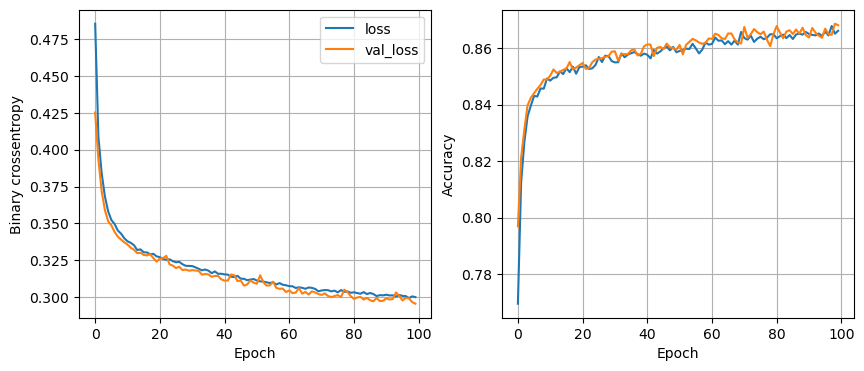

119/119 [==============================] - 0s 693us/step - loss: 0.3416 - accuracy: 0.8612
16 nodes, dropout 0, lr 0.005, batch_size 128


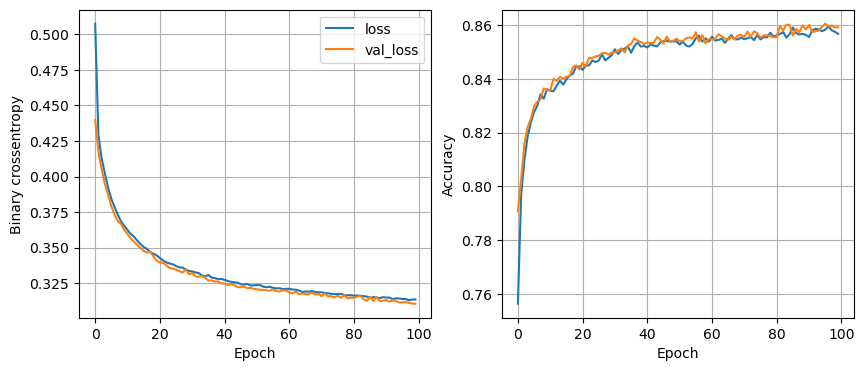

119/119 [==============================] - 0s 680us/step - loss: 0.3416 - accuracy: 0.8607
16 nodes, dropout 0, lr 0.001, batch_size 32


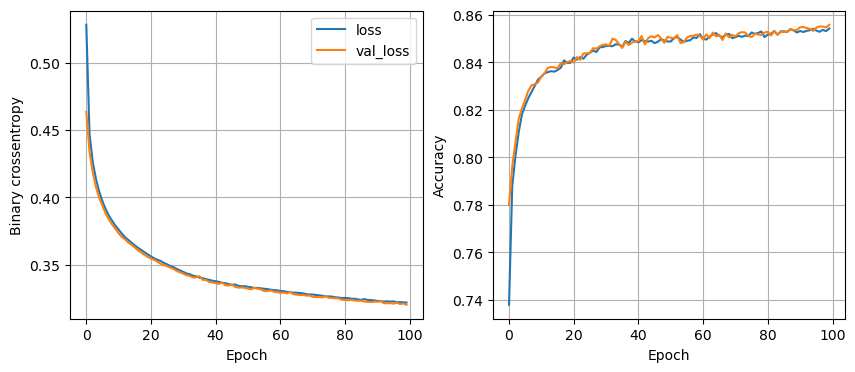

119/119 [==============================] - 0s 824us/step - loss: 0.3455 - accuracy: 0.8580
16 nodes, dropout 0, lr 0.001, batch_size 64


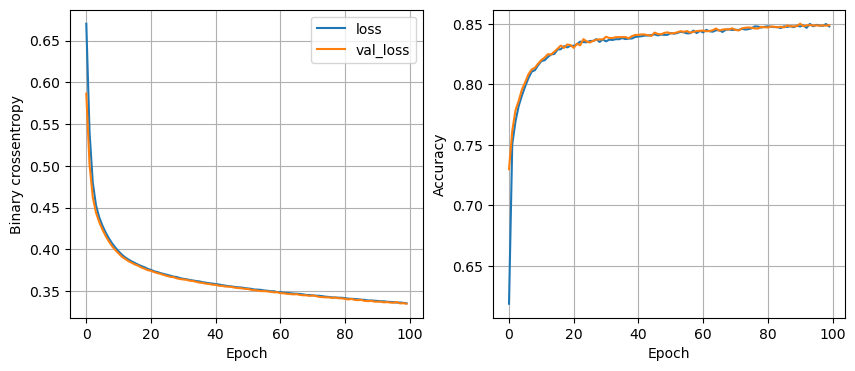

119/119 [==============================] - 0s 739us/step - loss: 0.3538 - accuracy: 0.8599
16 nodes, dropout 0, lr 0.001, batch_size 128


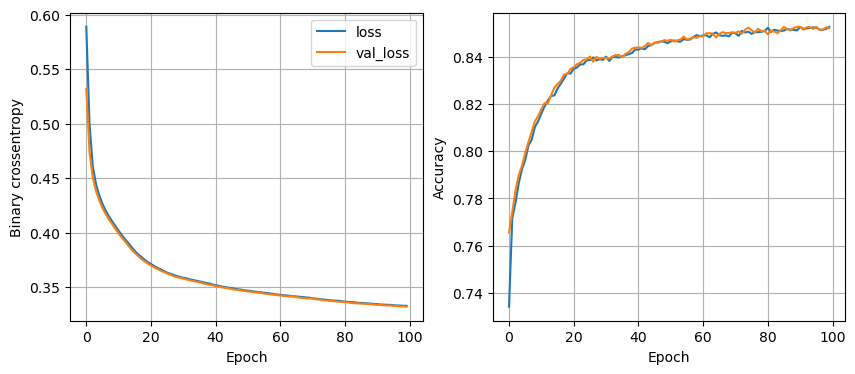

119/119 [==============================] - 0s 757us/step - loss: 0.3543 - accuracy: 0.8557
16 nodes, dropout 0.2, lr 0.01, batch_size 32


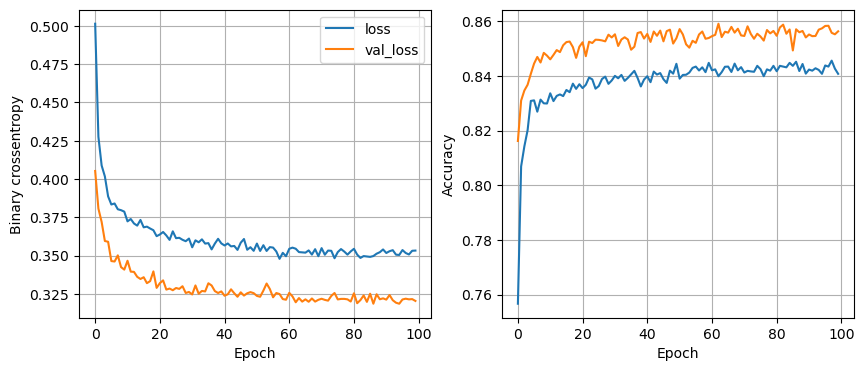

119/119 [==============================] - 0s 764us/step - loss: 0.3431 - accuracy: 0.8596
16 nodes, dropout 0.2, lr 0.01, batch_size 64


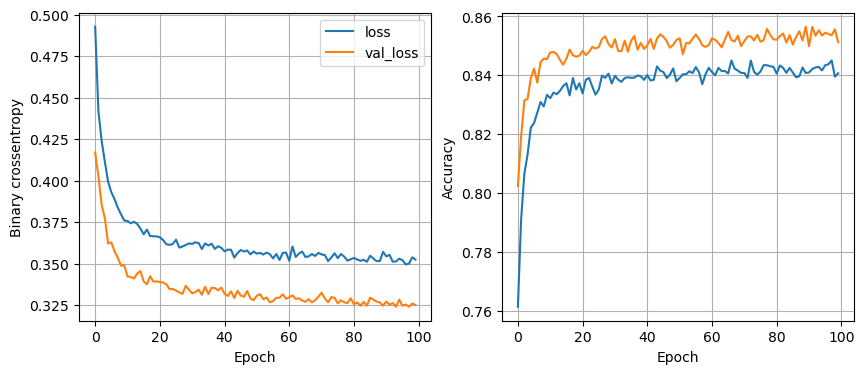

119/119 [==============================] - 0s 628us/step - loss: 0.3441 - accuracy: 0.8678
16 nodes, dropout 0.2, lr 0.01, batch_size 128


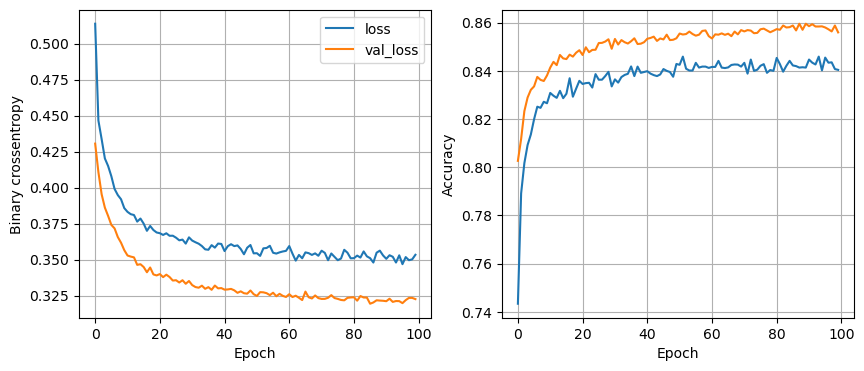

119/119 [==============================] - 0s 705us/step - loss: 0.3450 - accuracy: 0.8554
16 nodes, dropout 0.2, lr 0.005, batch_size 32


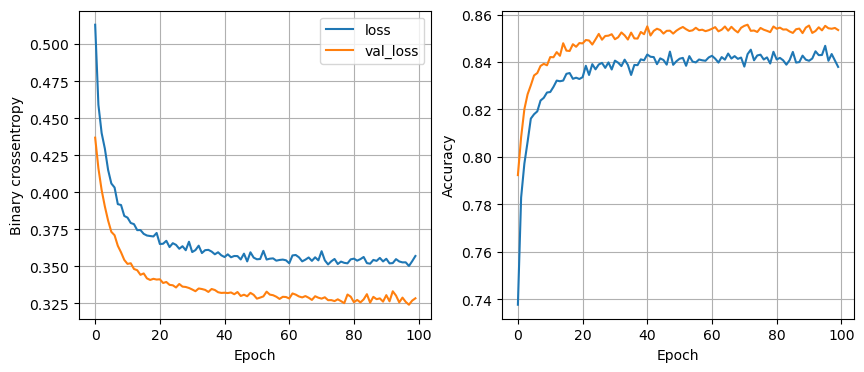

119/119 [==============================] - 0s 673us/step - loss: 0.3611 - accuracy: 0.8583
16 nodes, dropout 0.2, lr 0.005, batch_size 64


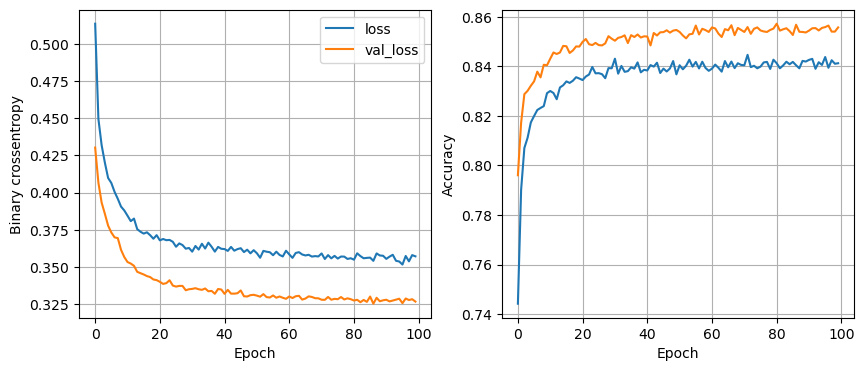

119/119 [==============================] - 0s 581us/step - loss: 0.3469 - accuracy: 0.8586
16 nodes, dropout 0.2, lr 0.005, batch_size 128


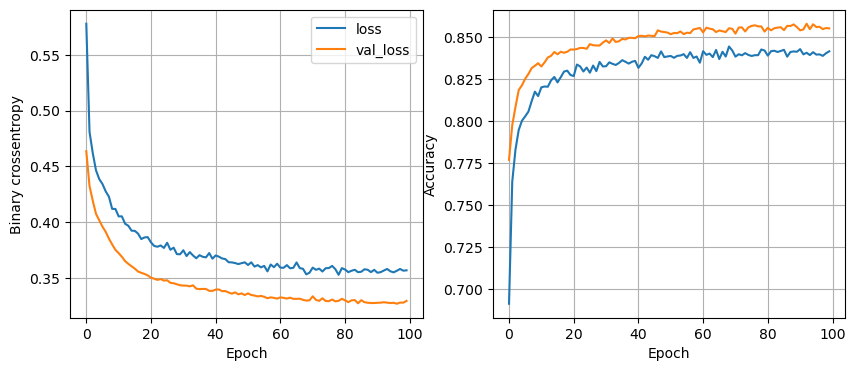

119/119 [==============================] - 0s 626us/step - loss: 0.3336 - accuracy: 0.8646
16 nodes, dropout 0.2, lr 0.001, batch_size 32


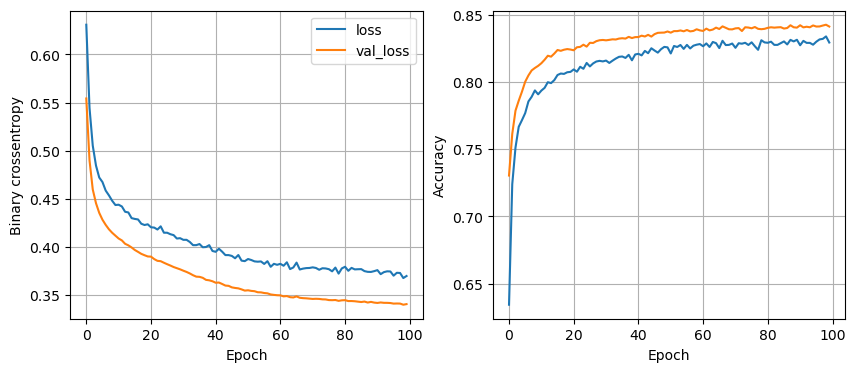

119/119 [==============================] - 0s 700us/step - loss: 0.3587 - accuracy: 0.8467
16 nodes, dropout 0.2, lr 0.001, batch_size 64


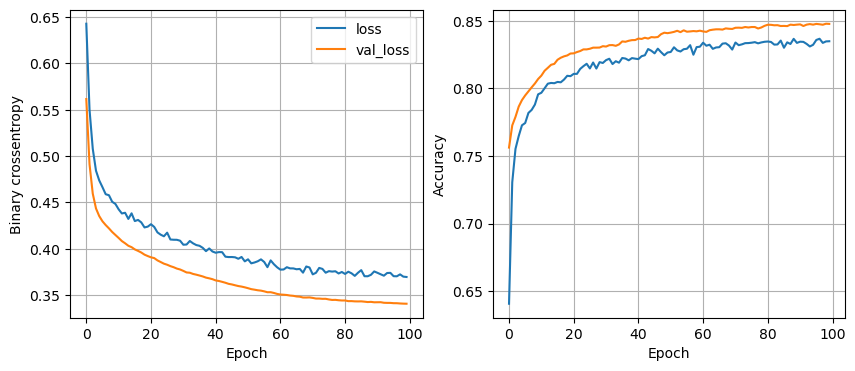

119/119 [==============================] - 0s 706us/step - loss: 0.3605 - accuracy: 0.8533
16 nodes, dropout 0.2, lr 0.001, batch_size 128


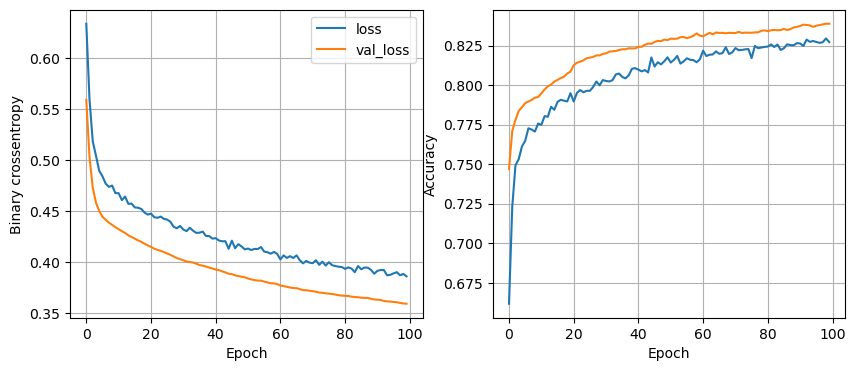

119/119 [==============================] - 0s 542us/step - loss: 0.3701 - accuracy: 0.8452
32 nodes, dropout 0, lr 0.01, batch_size 32


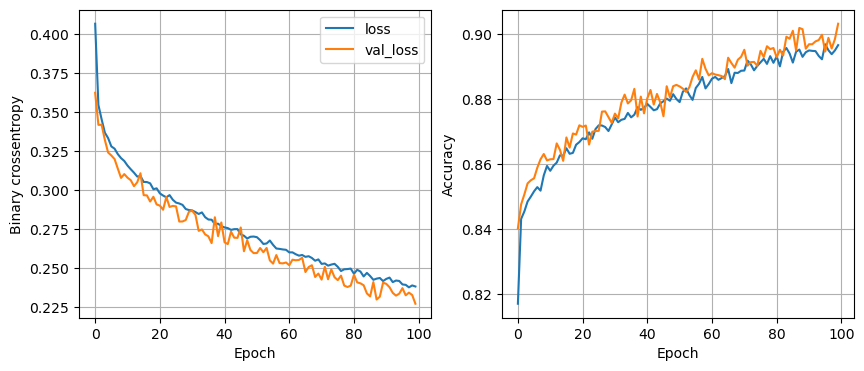

119/119 [==============================] - 0s 738us/step - loss: 0.3546 - accuracy: 0.8594
32 nodes, dropout 0, lr 0.01, batch_size 64


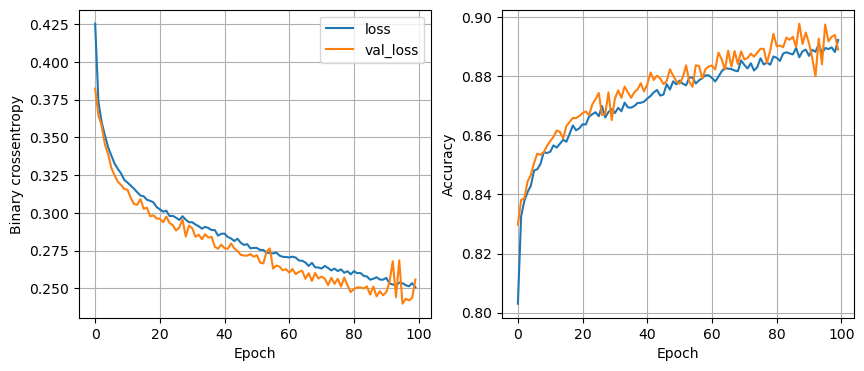

119/119 [==============================] - 0s 720us/step - loss: 0.3541 - accuracy: 0.8588
32 nodes, dropout 0, lr 0.01, batch_size 128


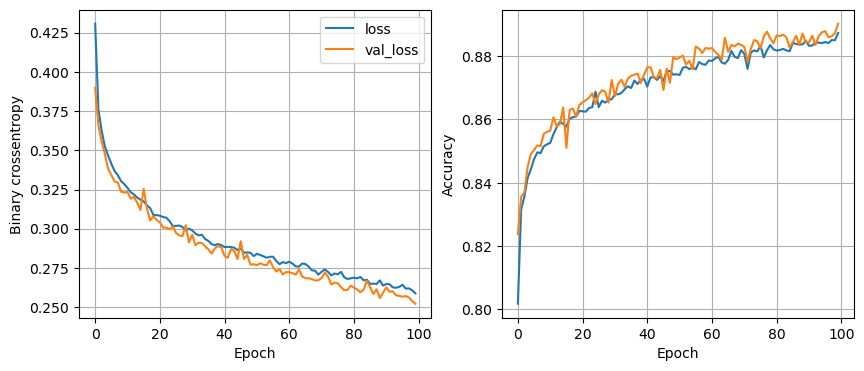

119/119 [==============================] - 0s 1ms/step - loss: 0.3694 - accuracy: 0.8515
32 nodes, dropout 0, lr 0.005, batch_size 32


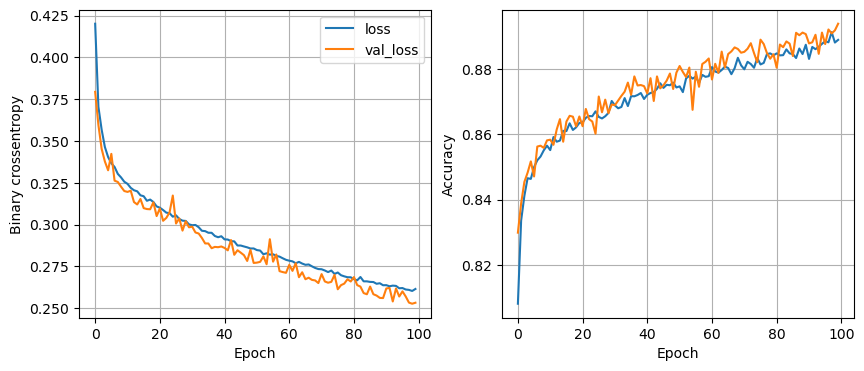

119/119 [==============================] - 0s 719us/step - loss: 0.3588 - accuracy: 0.8515
32 nodes, dropout 0, lr 0.005, batch_size 64


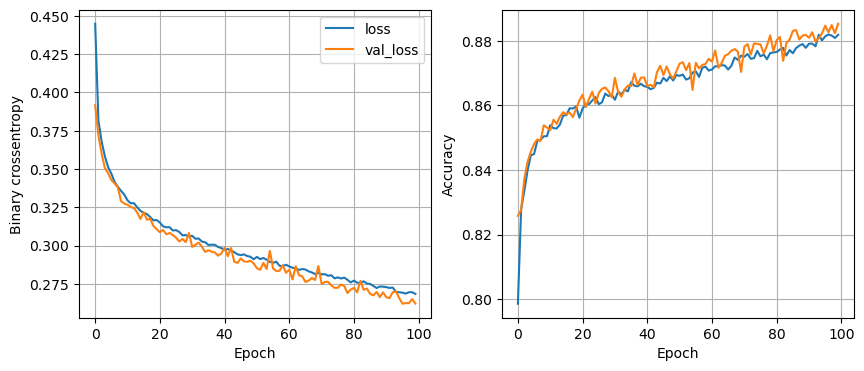

119/119 [==============================] - 0s 638us/step - loss: 0.3409 - accuracy: 0.8583
32 nodes, dropout 0, lr 0.005, batch_size 128


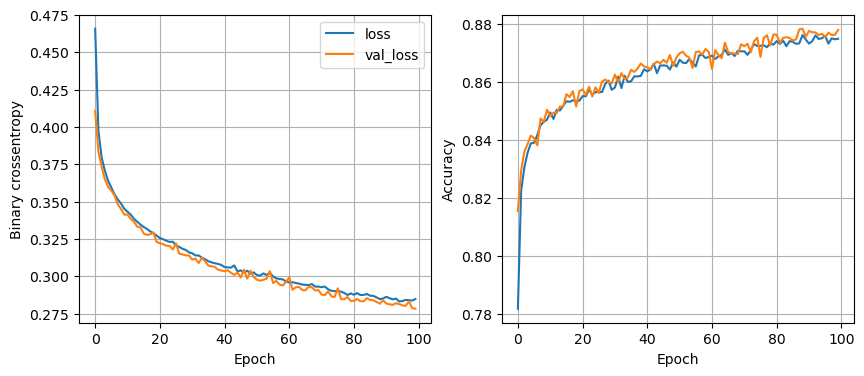

119/119 [==============================] - 0s 615us/step - loss: 0.3454 - accuracy: 0.8583
32 nodes, dropout 0, lr 0.001, batch_size 32


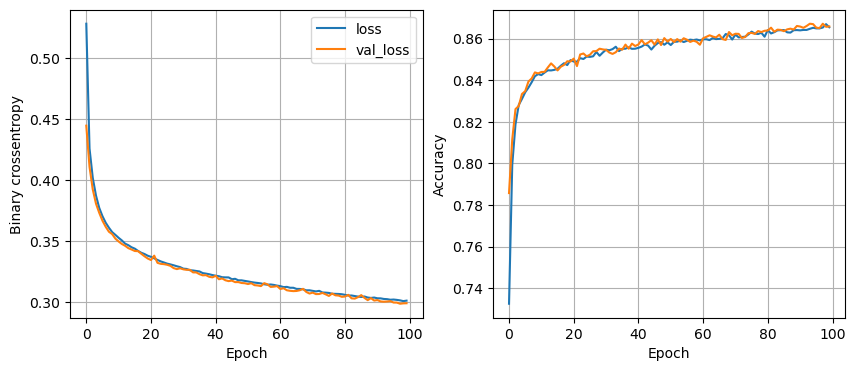

119/119 [==============================] - 0s 694us/step - loss: 0.3320 - accuracy: 0.8615
32 nodes, dropout 0, lr 0.001, batch_size 64


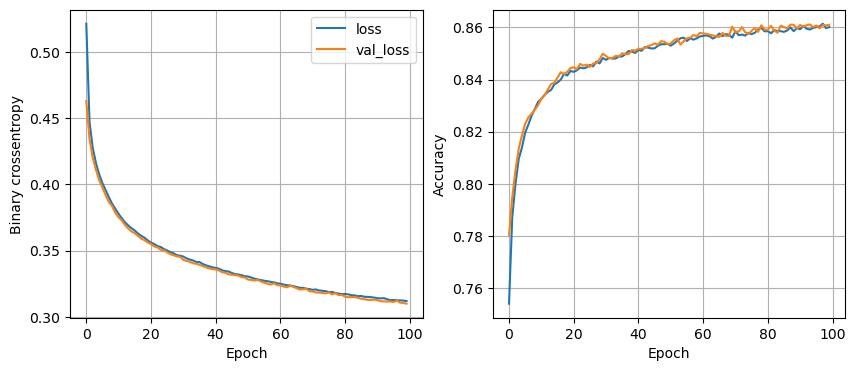

119/119 [==============================] - 0s 716us/step - loss: 0.3445 - accuracy: 0.8573
32 nodes, dropout 0, lr 0.001, batch_size 128


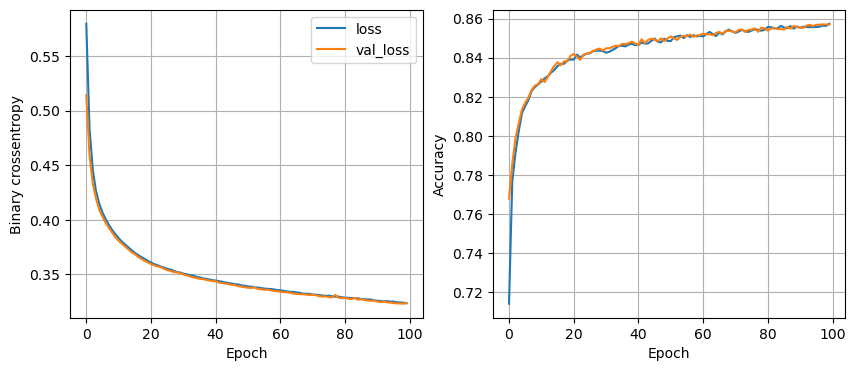

119/119 [==============================] - 0s 639us/step - loss: 0.3382 - accuracy: 0.8636
32 nodes, dropout 0.2, lr 0.01, batch_size 32


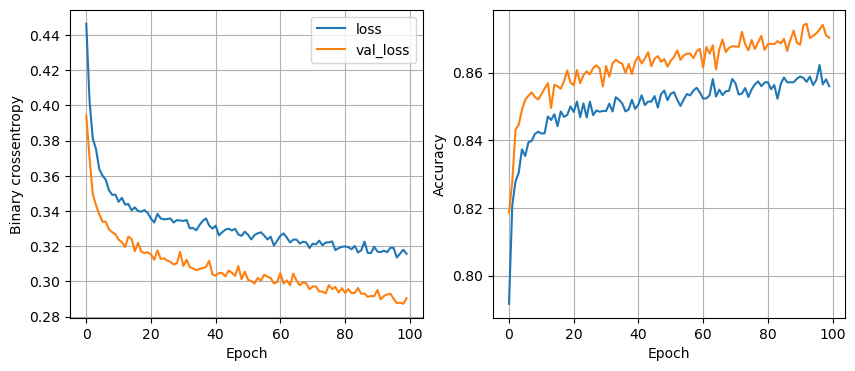

119/119 [==============================] - 0s 806us/step - loss: 0.3159 - accuracy: 0.8770
32 nodes, dropout 0.2, lr 0.01, batch_size 64


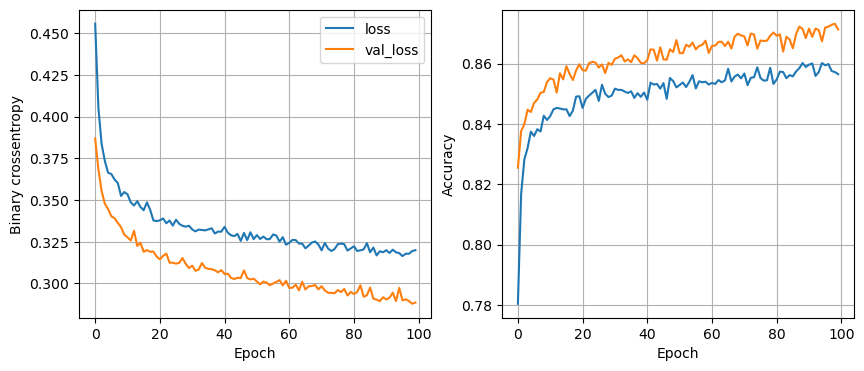

119/119 [==============================] - 0s 910us/step - loss: 0.3285 - accuracy: 0.8649
32 nodes, dropout 0.2, lr 0.01, batch_size 128


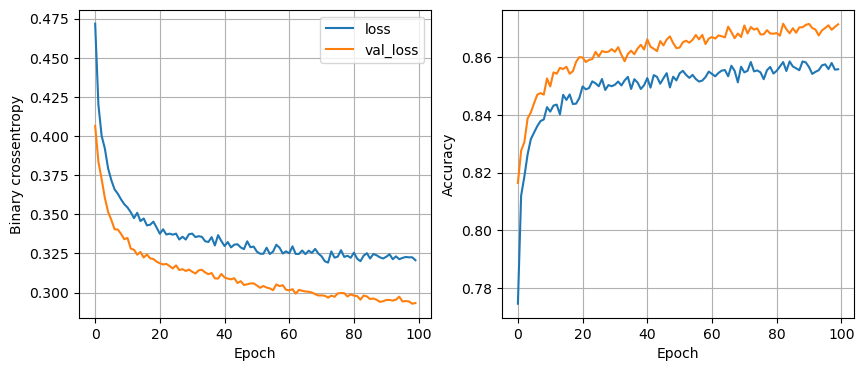

119/119 [==============================] - 0s 704us/step - loss: 0.3340 - accuracy: 0.8646
32 nodes, dropout 0.2, lr 0.005, batch_size 32


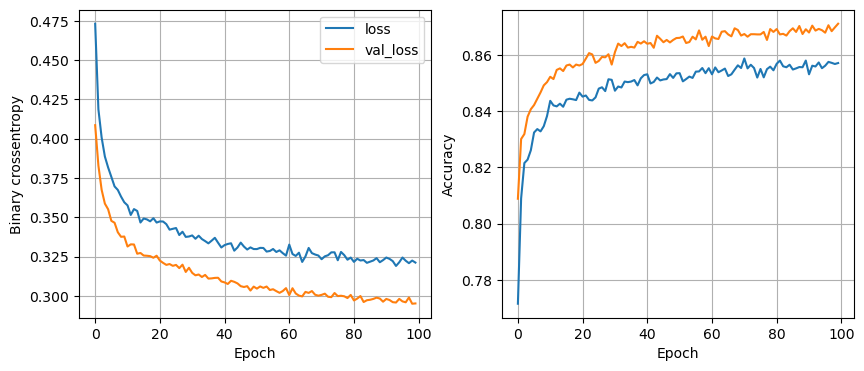

119/119 [==============================] - 0s 895us/step - loss: 0.3229 - accuracy: 0.8667
32 nodes, dropout 0.2, lr 0.005, batch_size 64


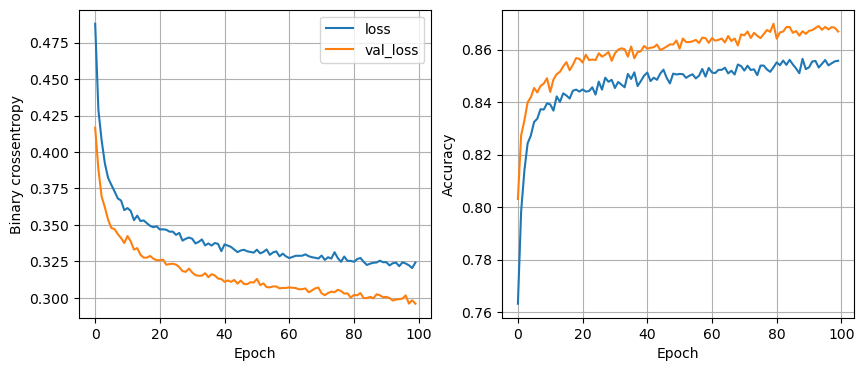

119/119 [==============================] - 0s 732us/step - loss: 0.3369 - accuracy: 0.8609
32 nodes, dropout 0.2, lr 0.005, batch_size 128


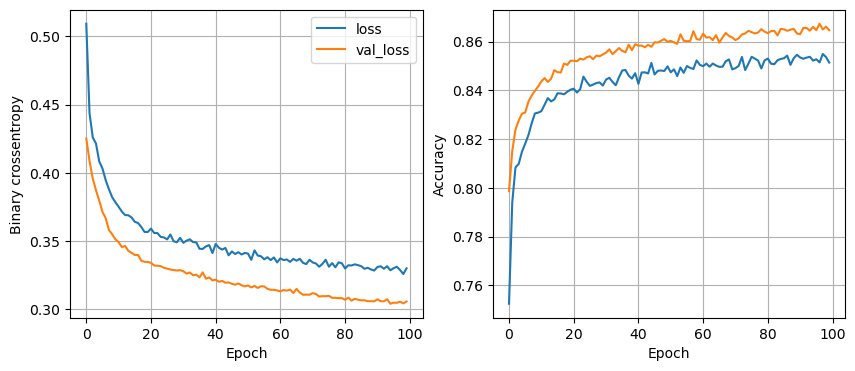

119/119 [==============================] - 0s 1ms/step - loss: 0.3242 - accuracy: 0.8672
32 nodes, dropout 0.2, lr 0.001, batch_size 32


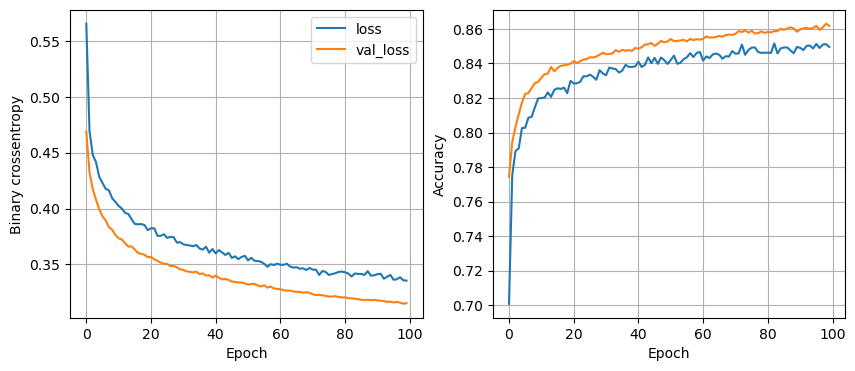

119/119 [==============================] - 0s 797us/step - loss: 0.3329 - accuracy: 0.8678
32 nodes, dropout 0.2, lr 0.001, batch_size 64


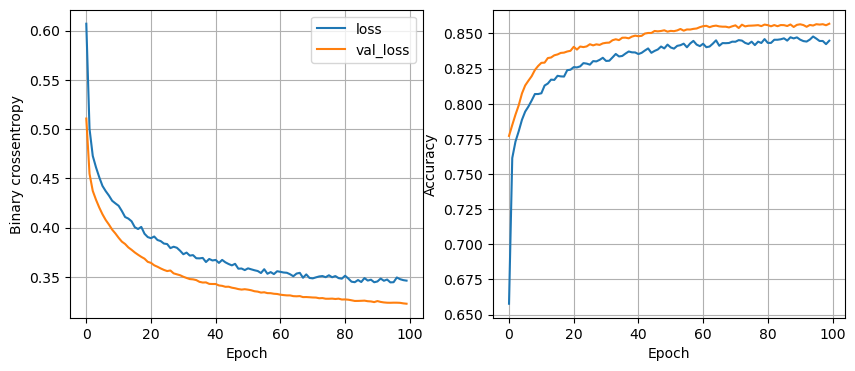

119/119 [==============================] - 0s 651us/step - loss: 0.3454 - accuracy: 0.8594
32 nodes, dropout 0.2, lr 0.001, batch_size 128


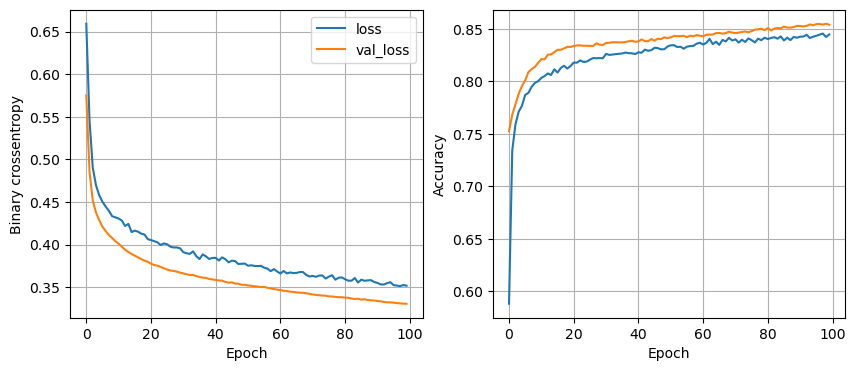

119/119 [==============================] - 0s 700us/step - loss: 0.3503 - accuracy: 0.8612
64 nodes, dropout 0, lr 0.01, batch_size 32


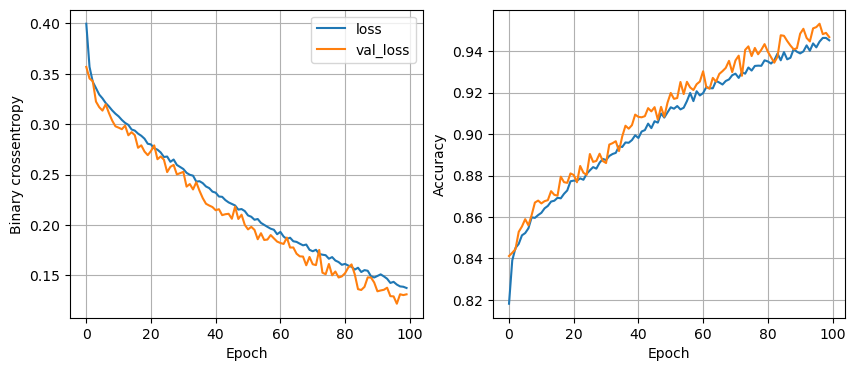

119/119 [==============================] - 0s 913us/step - loss: 0.5314 - accuracy: 0.8336
64 nodes, dropout 0, lr 0.01, batch_size 64


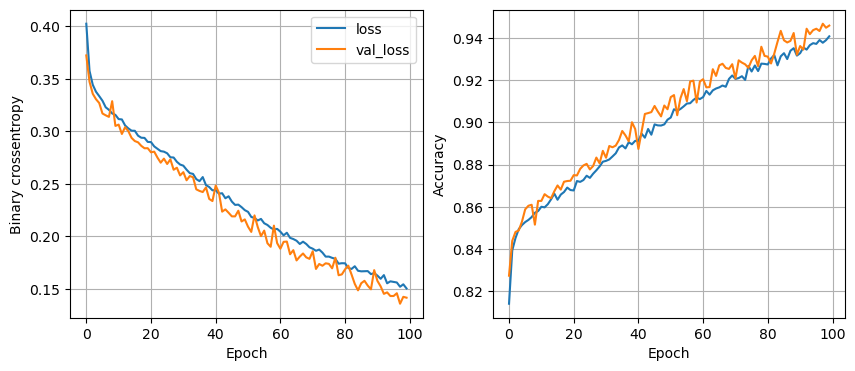

119/119 [==============================] - 0s 1ms/step - loss: 0.4562 - accuracy: 0.8557
64 nodes, dropout 0, lr 0.01, batch_size 128


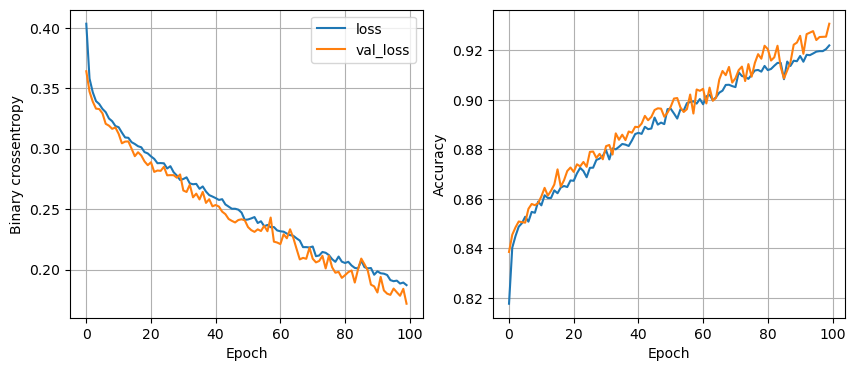

119/119 [==============================] - 0s 1ms/step - loss: 0.3880 - accuracy: 0.8533
64 nodes, dropout 0, lr 0.005, batch_size 32


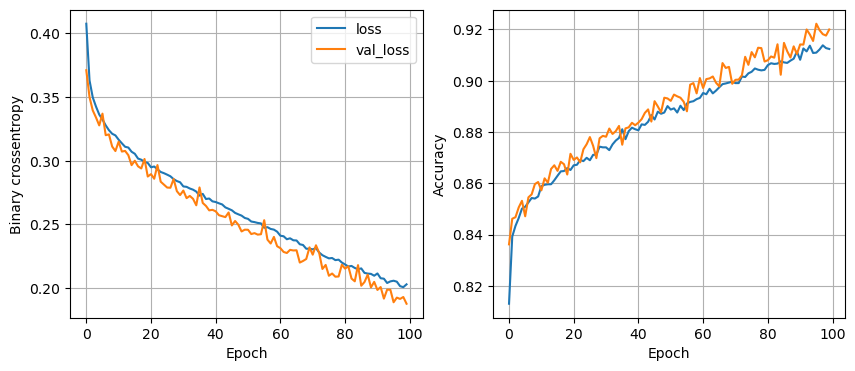

119/119 [==============================] - 0s 597us/step - loss: 0.3837 - accuracy: 0.8620
64 nodes, dropout 0, lr 0.005, batch_size 64


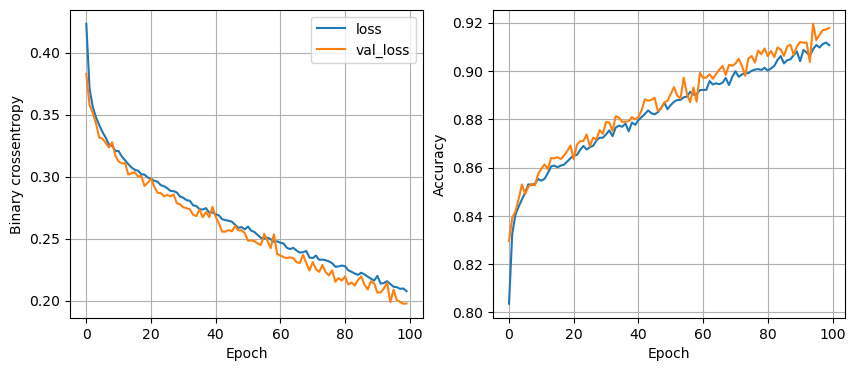

119/119 [==============================] - 0s 655us/step - loss: 0.3980 - accuracy: 0.8549
64 nodes, dropout 0, lr 0.005, batch_size 128


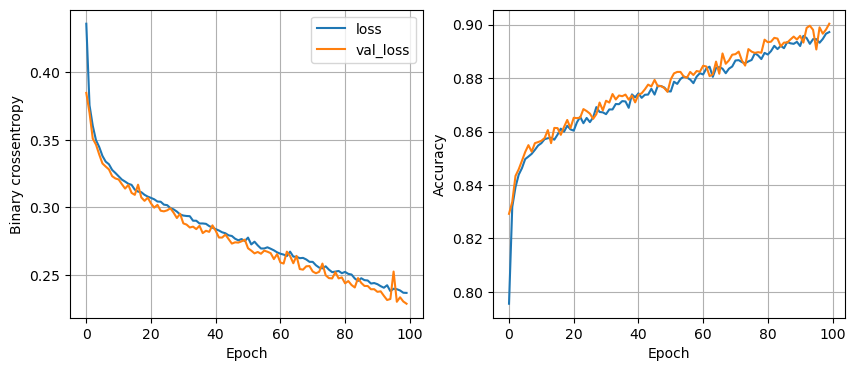

119/119 [==============================] - 0s 612us/step - loss: 0.3424 - accuracy: 0.8693
64 nodes, dropout 0, lr 0.001, batch_size 32


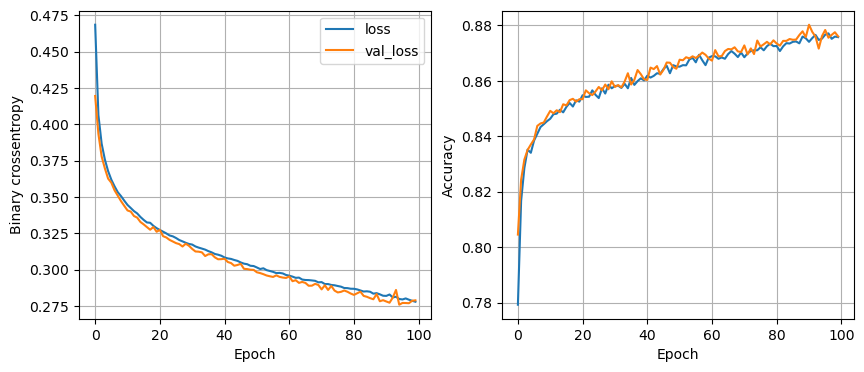

119/119 [==============================] - 0s 633us/step - loss: 0.3562 - accuracy: 0.8486
64 nodes, dropout 0, lr 0.001, batch_size 64


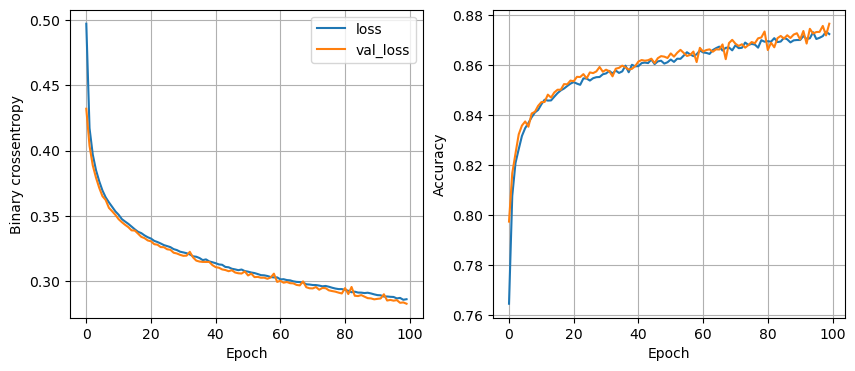

119/119 [==============================] - 0s 867us/step - loss: 0.3355 - accuracy: 0.8591
64 nodes, dropout 0, lr 0.001, batch_size 128


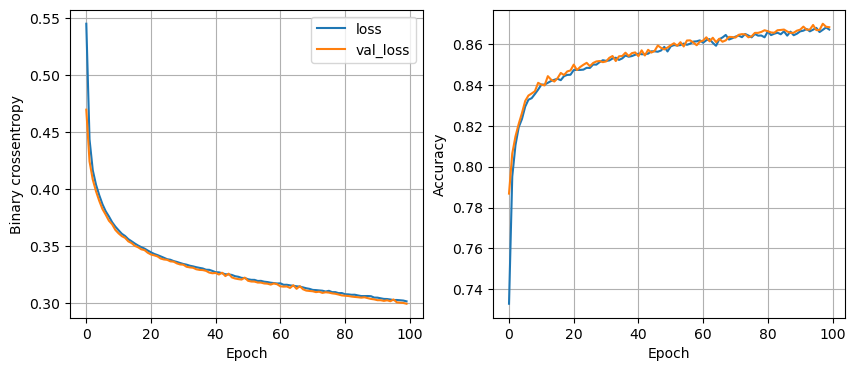

119/119 [==============================] - 0s 525us/step - loss: 0.3387 - accuracy: 0.8628
64 nodes, dropout 0.2, lr 0.01, batch_size 32


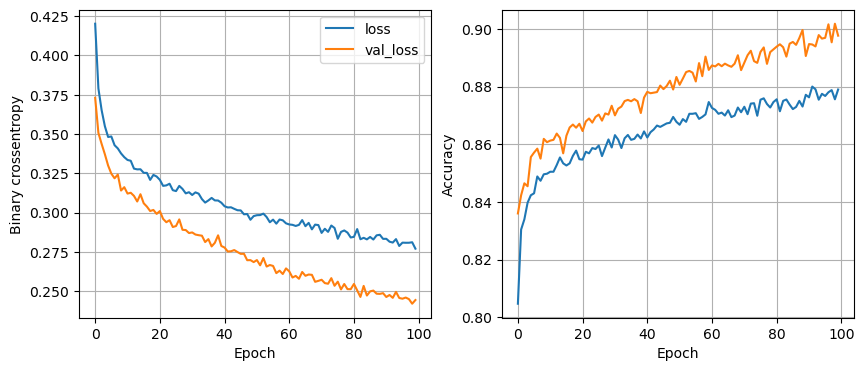

119/119 [==============================] - 0s 526us/step - loss: 0.3302 - accuracy: 0.8638
64 nodes, dropout 0.2, lr 0.01, batch_size 64


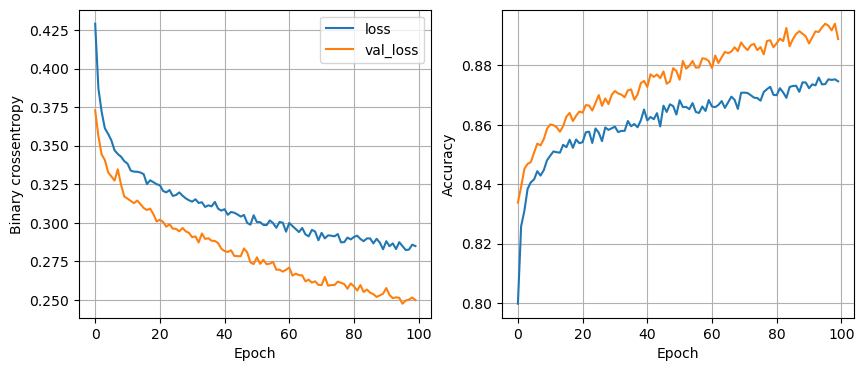

119/119 [==============================] - 0s 546us/step - loss: 0.3162 - accuracy: 0.8762
64 nodes, dropout 0.2, lr 0.01, batch_size 128


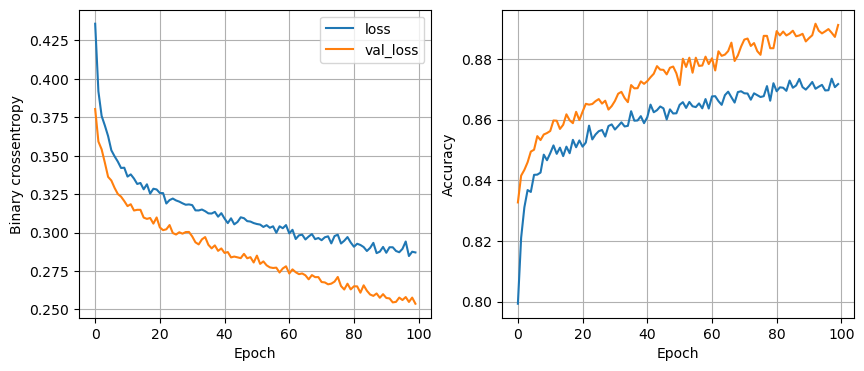

119/119 [==============================] - 0s 631us/step - loss: 0.3249 - accuracy: 0.8636
64 nodes, dropout 0.2, lr 0.005, batch_size 32


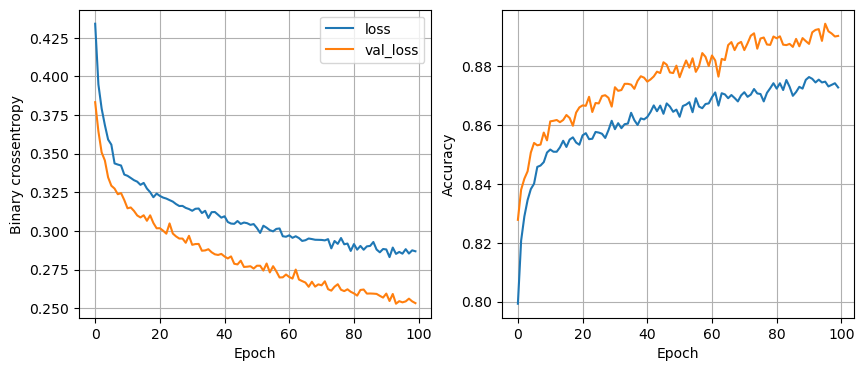

119/119 [==============================] - 0s 897us/step - loss: 0.3125 - accuracy: 0.8696
64 nodes, dropout 0.2, lr 0.005, batch_size 64


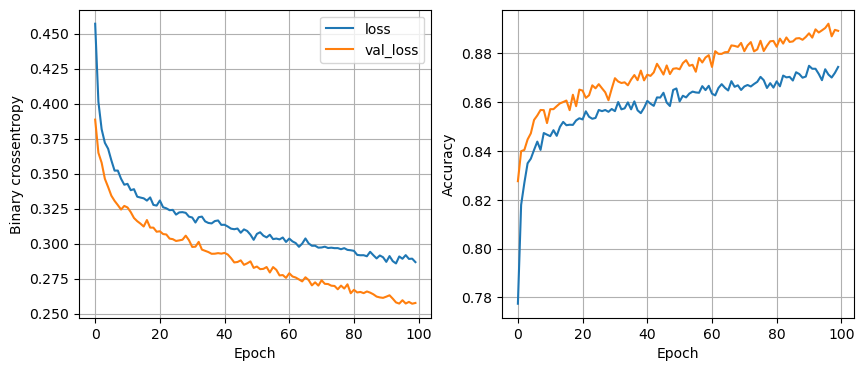

119/119 [==============================] - 0s 718us/step - loss: 0.3095 - accuracy: 0.8749
64 nodes, dropout 0.2, lr 0.005, batch_size 128


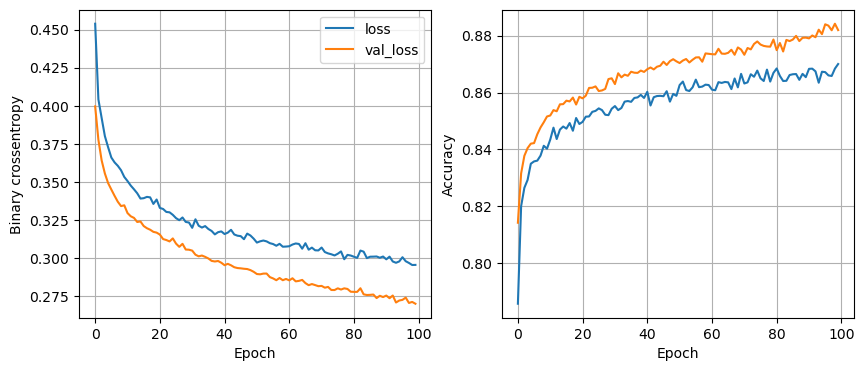

119/119 [==============================] - 0s 563us/step - loss: 0.3272 - accuracy: 0.8665
64 nodes, dropout 0.2, lr 0.001, batch_size 32


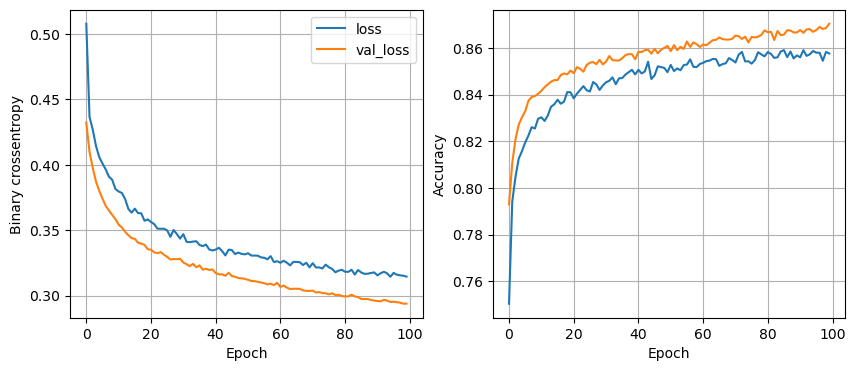

119/119 [==============================] - 0s 557us/step - loss: 0.3272 - accuracy: 0.8604
64 nodes, dropout 0.2, lr 0.001, batch_size 64


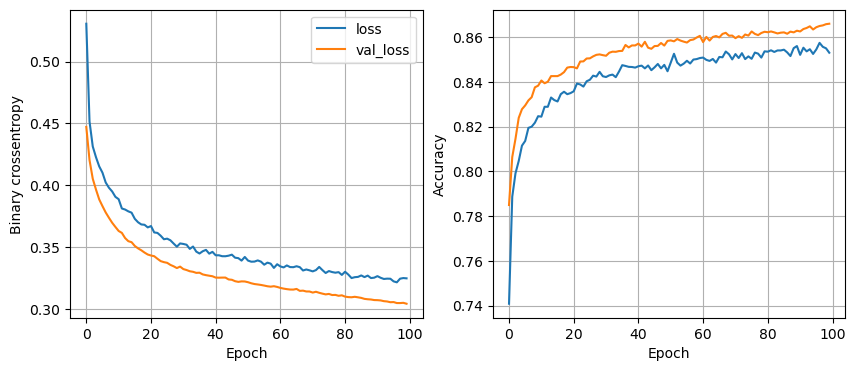

119/119 [==============================] - 0s 712us/step - loss: 0.3312 - accuracy: 0.8641
64 nodes, dropout 0.2, lr 0.001, batch_size 128


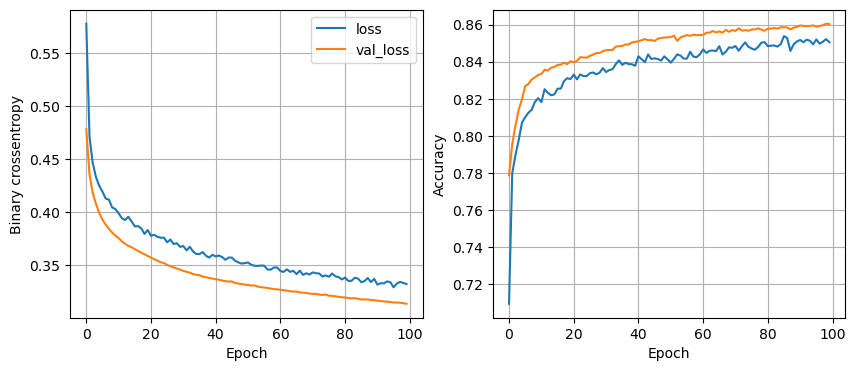

119/119 [==============================] - 0s 752us/step - loss: 0.3381 - accuracy: 0.8620


In [48]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
	for dropout_prob in [0, 0.2]:
		for lr in [0.01, 0.005, 0.001]:
			for batch_size in [32, 64, 128]:
				print(f'{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch_size {batch_size}')
				model, history = train_model(x_train=x_train, y_train=y_train, num_nodes=num_nodes, dropout_prob=dropout_prob, lr=lr, batch_size=batch_size, epochs=epochs, x_valid=x_valid, y_valid=y_valid)
				plot_history(history=history)
				val_loss = model.evaluate(x_valid, y_valid)[0]
				if val_loss < least_val_loss:
					least_val_loss = val_loss
					least_loss_model = model